# Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

awards_players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv')
coaches_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv')
players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')
players_teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv')
series_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv')
teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv')
teams_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv')

# Obtain data from only 9 years

In [39]:
awards_players_model = awards_players_cleaned[awards_players_cleaned['year'] != 10]
coaches_model = coaches_cleaned[coaches_cleaned['year'] != 10]
players_teams_model = players_teams_cleaned[players_teams_cleaned['year'] != 10]
series_post_model = series_post_cleaned[series_post_cleaned['year'] != 10]
teams_model = teams_cleaned[teams_cleaned['year'] != 10]
teams_post_model = teams_post_cleaned[teams_post_cleaned['year'] != 10]

os.makedirs('../data/basketballPlayoffs_model', exist_ok=True)

awards_players_model.to_csv('../data/basketballPlayoffs_model/awards_players_model.csv', index=False)
coaches_model.to_csv('../data/basketballPlayoffs_model/coaches_model.csv', index=False)
players_cleaned.to_csv('../data/basketballPlayoffs_model/players_model.csv', index=False)
players_teams_model.to_csv('../data/basketballPlayoffs_model/players_teams_model.csv', index=False)
series_post_model.to_csv('../data/basketballPlayoffs_model/series_post_model.csv', index=False)
teams_model.to_csv('../data/basketballPlayoffs_model/teams_model.csv', index=False)
teams_post_model.to_csv('../data/basketballPlayoffs_model/teams_post_model.csv', index=False)

# Overalls from only 9 years

In [40]:
players_overall_avg = players_teams_model.groupby('playerID')['OVERALL'].mean().reset_index()

players_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

players_overall_avg['OVERALL_ALL_TIME'] = players_overall_avg['OVERALL_ALL_TIME'].round(1)

players_overall_avg.to_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv', index=False)

In [41]:
rookie_players = players_teams_model[players_teams_model['is_rookie'] == 1]

rookie_overall_avg = rookie_players['OVERALL'].mean().round(1)

rookie_overall_avg_df = pd.DataFrame({'rookie_overall_avg': [rookie_overall_avg]})

rookie_overall_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_avg_model.csv', index=False)

In [42]:
rookie_coaches = coaches_model[coaches_model['is_rookie'] == 1]

rookie_overall_coaches_avg = rookie_coaches['OVERALL'].mean().round(1)

rookie_overall_coaches_avg_df = pd.DataFrame({'rookie_overall_coaches_avg': [rookie_overall_coaches_avg]})

rookie_overall_coaches_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_coaches_avg_model.csv', index=False)

In [43]:
coaches_overall_avg = coaches_model.groupby('coachID')['OVERALL'].mean().reset_index()

coaches_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

coaches_overall_avg['OVERALL_ALL_TIME'] = coaches_overall_avg['OVERALL_ALL_TIME'].round(1)

coaches_overall_avg.to_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv', index=False)

# Obtain ranks from the 10th year to compare

In [44]:
playoffs_10th_year = teams_cleaned[teams_cleaned['year'] == 10][['tmID', 'playoff']]

playoffs_10th_year.to_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv', index=False)

# Obtain teams line up and coach from the 10th year

In [45]:
coaches_model_10th_year = coaches_cleaned[coaches_cleaned['year'] == 10][['coachID', 'tmID',]]

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)

In [46]:
players_model_10th_year = players_teams_cleaned[players_teams_cleaned['year'] == 10][['playerID','tmID']]

players_model_10th_year = players_model_10th_year.sort_values(by='tmID')

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

# Add overalls calculated from 9 years to the 10th year players and coach

In [47]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')
players_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv')

rookie_avg = 5.6 

players_model_10th_year = players_model_10th_year.merge(
    players_overall_all_time_model[['playerID', 'OVERALL_ALL_TIME']],
    on='playerID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg})

players_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

In [48]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')
coaches_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv')

rookie_avg_coach = 8.9 

coaches_model_10th_year = coaches_model_10th_year.merge(
    coaches_overall_all_time_model[['coachID', 'OVERALL_ALL_TIME']],
    on='coachID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg_coach})

coaches_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)


# Given the teams players composition and their respective overalls calculate the team overall (mean of all players)

In [49]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')

team_overall = players_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall['overall_team'] = team_overall['OVERALL'].round(1)

team_overall = team_overall.drop(columns=['OVERALL'])

team_overall.to_csv('../data/basketballPlayoffs_model/team_overall.csv', index=False)

# Given the team coaches and their respective overalls calculate the coach overall (mean of all coaches(1 or more than 1))

In [50]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')

team_overall_coaches = coaches_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall_coaches['overall_team_coach'] = team_overall_coaches['OVERALL'].round(1)

team_overall_coaches = team_overall_coaches.drop(columns=['OVERALL'])

team_overall_coaches.to_csv('../data/basketballPlayoffs_model/team_overall_coaches.csv', index=False)

# Create team final overall ( 90% team + 10% coach)

In [51]:
team_overall = pd.read_csv('../data/basketballPlayoffs_model/team_overall.csv')
team_overall_coach = pd.read_csv('../data/basketballPlayoffs_model/team_overall_coaches.csv')
teams_model = pd.read_csv('../data/basketballPlayoffs_model/teams_model.csv')

merged_df = pd.merge(team_overall, team_overall_coach, on='tmID')

merged_df['overall_team_final'] = (merged_df['overall_team'] * 0.9) + (merged_df['overall_team_coach'] * 0.1)
merged_df['overall_team_final'] = merged_df['overall_team_final'].round(2)

merged_df = pd.merge(merged_df, teams_model[['tmID', 'confID']], on='tmID', how='left')

final_df = merged_df[['tmID', 'confID', 'overall_team_final']]

final_df = final_df.drop_duplicates(subset='tmID')

final_df = final_df.sort_values(by='overall_team_final', ascending=True)

final_df.to_csv('../data/basketballPlayoffs_model/team_final_overall.csv', index=False)

# Accuracy

In [52]:
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

top_teams_by_conf = team_final_overall.sort_values(by='overall_team_final', ascending=False).groupby('confID').head(4)

print("Teams that go to the playoffs acording to the previsions:\n")
print(top_teams_by_conf)

comparison = top_teams_by_conf.merge(playoffs_10th_year, on='tmID', how='left')

correct_predictions = comparison[comparison['playoff'] == 1]

print("\nTeams that are in the playoffs and in the previsions:\n")
print(correct_predictions)

accuracy = len(correct_predictions) / len(top_teams_by_conf) * 100
print(f"\nThe accuracy is {accuracy:.2f}%")


Teams that go to the playoffs acording to the previsions:

    tmID  confID  overall_team_final
12     8       1               11.17
11    16       1                9.13
10     5       0                8.95
9     13       1                8.68
8     17       1                8.54
5     11       0                8.28
4      7       0                8.21
3     19       0                8.18

Teams that are in the playoffs and in the previsions:

   tmID  confID  overall_team_final  playoff
0     8       1               11.17        1
1    16       1                9.13        1
2     5       0                8.95        1
3    13       1                8.68        1
4    17       1                8.54        1
6     7       0                8.21        1
7    19       0                8.18        1

The accuracy is 87.50%


## SVM MODEL

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

# Merge the overall data with the playoff data
data = pd.merge(team_final_overall, playoffs_10th_year, on='tmID', how='inner')

# Split the data into predictor variables (overalls) and target variables (playoffs)
X = data[['overall_team_final']]  # The predictor variable (team's overall average)
y = data['playoff']  # The target variable (1 if the team made it to the playoffs, 0 otherwise)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model with probability enabled
svm_model = SVC(kernel='linear', probability=True)  # Enable probability=True
svm_model.fit(X_train, y_train)

# Make probability predictions for all teams (not just the test set)
probabilities = svm_model.predict_proba(X)[:, 1]  # Probability of the team making the playoffs

# Split the data into two conferences: confID == 1 and confID == 0
conf_1_data = data[data['confID'] == 1]
conf_0_data = data[data['confID'] == 0]

# Normalize the probabilities within each conference
conf_1_probabilities = (probabilities[conf_1_data.index] - probabilities[conf_1_data.index].min()) / (probabilities[conf_1_data.index].max() - probabilities[conf_1_data.index].min())  # Normalize between 0 and 1
conf_0_probabilities = (probabilities[conf_0_data.index] - probabilities[conf_0_data.index].min()) / (probabilities[conf_0_data.index].max() - probabilities[conf_0_data.index].min())  # Normalize between 0 and 1

# Adjust the probabilities so that their sum is equal to 8, separately for each conference
conf_1_probability_sum = conf_1_probabilities.sum()
conf_0_probability_sum = conf_0_probabilities.sum()

# Adjust the probabilities so that the sum equals 8 within each conference
adjusted_conf_1_probabilities = conf_1_probabilities * 8 / conf_1_probability_sum
adjusted_conf_0_probabilities = conf_0_probabilities * 8 / conf_0_probability_sum

# **Adjust probabilities based on the "overall_team_final"**
# Calculate the probabilities directly based on "overall_team_final" for each conference
conf_1_data = conf_1_data.copy()  # Create an explicit copy
conf_0_data = conf_0_data.copy()  # Create an explicit copy

conf_1_data['adjusted_probability'] = conf_1_data['overall_team_final'] / conf_1_data['overall_team_final'].max() / 2
conf_0_data['adjusted_probability'] = conf_0_data['overall_team_final'] / conf_0_data['overall_team_final'].max() / 2

conf_1_data['probability'] = adjusted_conf_1_probabilities
conf_0_data['probability'] = adjusted_conf_0_probabilities

conf_1_data['predicted'] = 0
conf_0_data['predicted'] = 0

# Add predictions to the dataset, considering the top 4 teams per conference
for conf_data in [conf_1_data, conf_0_data]:
    top_teams = conf_data.nlargest(4, 'overall_team_final')  # Select the top 4 teams
    conf_data.loc[top_teams.index, 'predicted'] = 1  # Mark the top 4 teams as 1 (make the playoffs)

# Concatenate the data from both conferences
final_data = pd.concat([conf_1_data, conf_0_data])

# Round the 'adjusted_probability' to 2 decimal places
final_data['adjusted_probability'] = final_data['adjusted_probability'].round(2)

# Sort the teams by adjusted_probability in descending order
final_data_sorted = final_data.sort_values(by='adjusted_probability', ascending=False)

# Display all teams and their adjusted probabilities, predictions, etc., sorted by adjusted_probability
print("Final Table with Teams and their Adjusted Probabilities (Sorted by Adjusted Probability):")
print(final_data_sorted[['tmID', 'confID', 'predicted', 'playoff', 'adjusted_probability', 'overall_team_final']])

# Compute the overall accuracy (for all teams combined, not per conference)
overall_accuracy = accuracy_score(final_data['playoff'], final_data['predicted'])

print(f"\nOverall Accuracy of prediction vs actual: {overall_accuracy:.2f}")


Final Table with Teams and their Adjusted Probabilities (Sorted by Adjusted Probability):
    tmID  confID  predicted  playoff  adjusted_probability  overall_team_final
12     8       1          1        1                  0.50               11.17
10     5       0          1        1                  0.50                8.95
3     19       0          1        1                  0.46                8.18
4      7       0          1        1                  0.46                8.21
5     11       0          1        0                  0.46                8.28
1      0       0          0        1                  0.45                7.97
2      4       0          0        0                  0.45                8.06
0      2       0          0        0                  0.44                7.90
11    16       1          1        1                  0.41                9.13
9     13       1          1        1                  0.39                8.68
6     15       1          0        0     

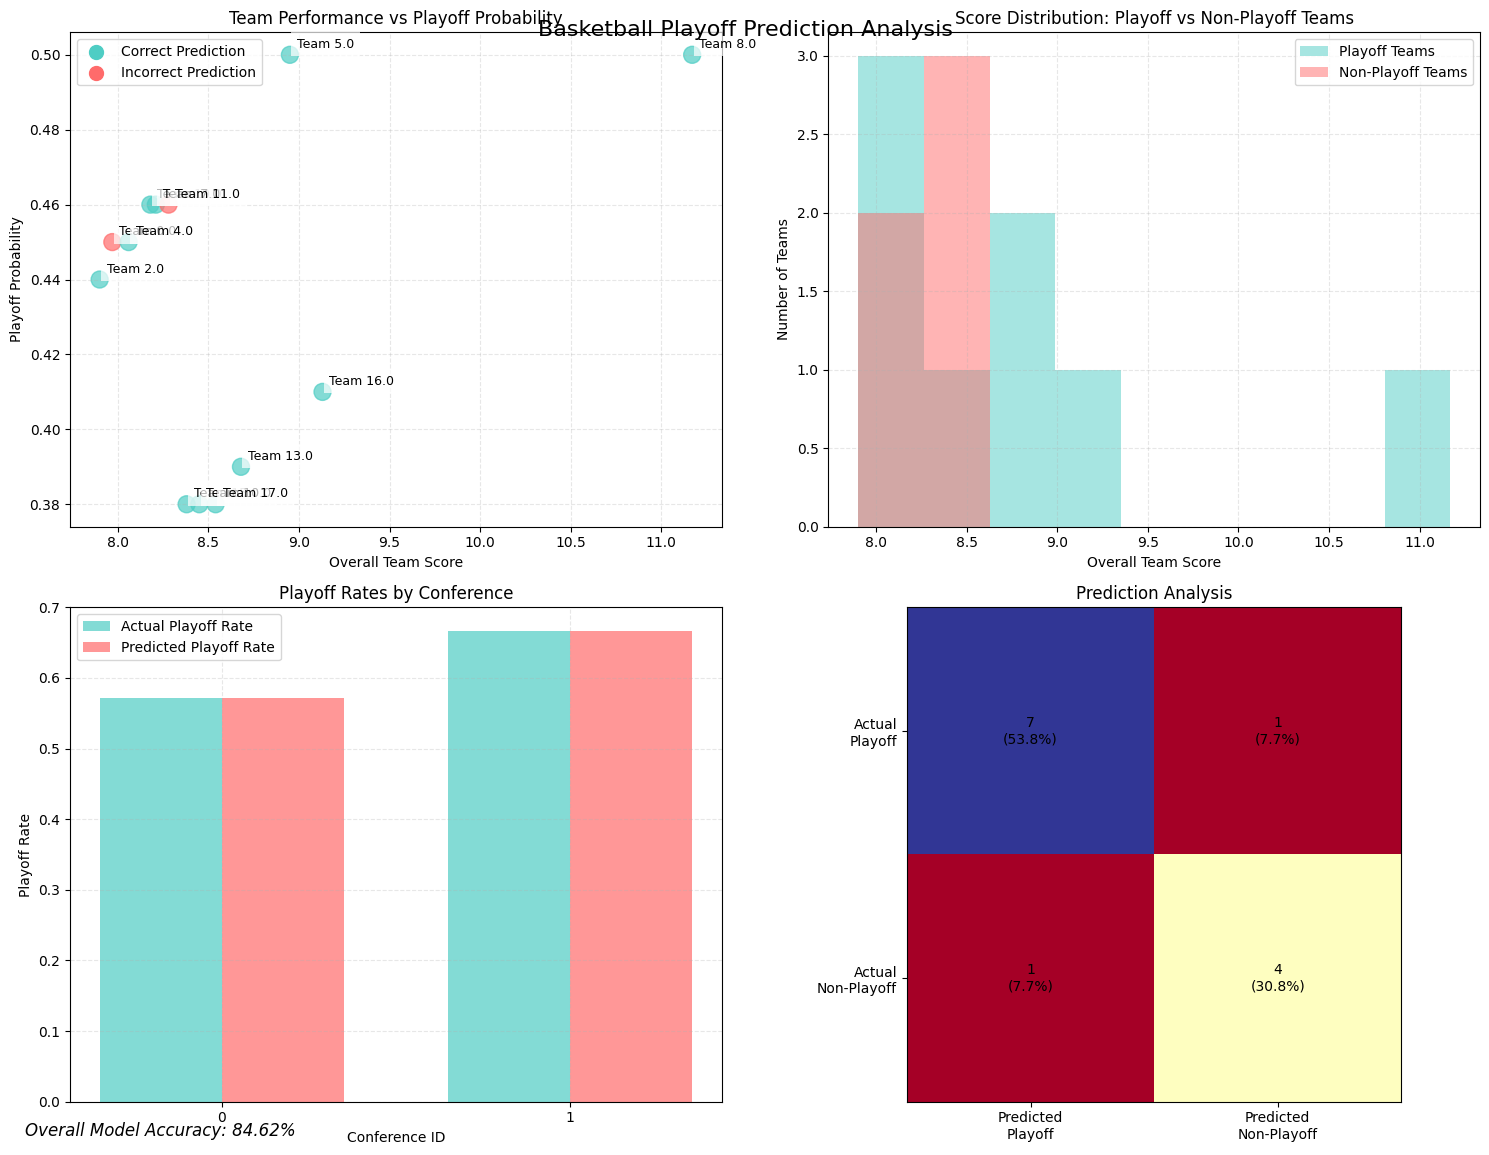

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def create_enhanced_visualization(final_data, save_path=None):
    """
    Create an enhanced visualization of SVM results with multiple informative plots.
    
    Parameters:
    final_data: DataFrame containing the team data and predictions
    save_path: Optional path to save the figure
    """
    # Create figure with custom layout
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(2, 2, figure=fig)
    
    # Set style
    plt.style.use('default')
    fig.patch.set_facecolor('white')
    
    # 1. Main Scatter Plot (Top Left)
    ax1 = fig.add_subplot(gs[0, 0])
    create_team_scatter(ax1, final_data)
    
    # 2. Performance Distribution (Top Right)
    ax2 = fig.add_subplot(gs[0, 1])
    create_performance_distribution(ax2, final_data)
    
    # 3. Conference Analysis (Bottom Left)
    ax3 = fig.add_subplot(gs[1, 0])
    create_conference_analysis(ax3, final_data)
    
    # 4. Prediction Analysis (Bottom Right)
    ax4 = fig.add_subplot(gs[1, 1])
    create_prediction_analysis(ax4, final_data)
    
    # Add overall title
    fig.suptitle('Basketball Playoff Prediction Analysis', 
                 fontsize=16, y=0.95)
    
    # Add accuracy score
    accuracy = (final_data['predicted'] == final_data['playoff']).mean()
    fig.text(0.02, 0.02, f'Overall Model Accuracy: {accuracy:.2%}', 
             fontsize=12, style='italic')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig

def create_team_scatter(ax, data):
    """Create the main scatter plot of team performance."""
    colors = ['#ff6b6b' if pred != actual else '#4ecdc4' 
              for pred, actual in zip(data['predicted'], data['playoff'])]
    
    scatter = ax.scatter(data['overall_team_final'], 
                        data['adjusted_probability'],
                        c=colors, 
                        s=150,
                        alpha=0.7)
    
    # Add team labels
    for idx, row in data.iterrows():
        ax.annotate(f"Team {row['tmID']}", 
                   (row['overall_team_final'], row['adjusted_probability']),
                   xytext=(5, 5), 
                   textcoords='offset points',
                   fontsize=9,
                   bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
    ax.set_xlabel('Overall Team Score')
    ax.set_ylabel('Playoff Probability')
    ax.set_title('Team Performance vs Playoff Probability')
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Add legend
    ax.scatter([], [], c='#4ecdc4', label='Correct Prediction', s=100)
    ax.scatter([], [], c='#ff6b6b', label='Incorrect Prediction', s=100)
    ax.legend()

def create_performance_distribution(ax, data):
    """Create performance distribution visualization."""
    # Create bins for team scores
    bins = np.linspace(data['overall_team_final'].min(), 
                      data['overall_team_final'].max(), 
                      10)
    
    # Plot distributions
    ax.hist(data[data['playoff'] == 1]['overall_team_final'], 
            bins=bins, alpha=0.5, label='Playoff Teams', color='#4ecdc4')
    ax.hist(data[data['playoff'] == 0]['overall_team_final'], 
            bins=bins, alpha=0.5, label='Non-Playoff Teams', color='#ff6b6b')
    
    ax.set_xlabel('Overall Team Score')
    ax.set_ylabel('Number of Teams')
    ax.set_title('Score Distribution: Playoff vs Non-Playoff Teams')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

def create_conference_analysis(ax, data):
    """Create conference-based analysis visualization."""
    conf_data = data.groupby('confID').agg({
        'playoff': 'mean',
        'predicted': 'mean',
        'tmID': 'count'
    }).reset_index()
    
    x = range(len(conf_data))
    width = 0.35
    
    ax.bar([i - width/2 for i in x], conf_data['playoff'], 
           width, label='Actual Playoff Rate', color='#4ecdc4', alpha=0.7)
    ax.bar([i + width/2 for i in x], conf_data['predicted'], 
           width, label='Predicted Playoff Rate', color='#ff6b6b', alpha=0.7)
    
    ax.set_xlabel('Conference ID')
    ax.set_ylabel('Playoff Rate')
    ax.set_title('Playoff Rates by Conference')
    ax.set_xticks(x)
    ax.set_xticklabels(conf_data['confID'])
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

def create_prediction_analysis(ax, data):
    """Create prediction analysis with confusion-matrix-style visualization."""
    # Calculate confusion matrix values
    tp = ((data['predicted'] == 1) & (data['playoff'] == 1)).sum()
    fp = ((data['predicted'] == 1) & (data['playoff'] == 0)).sum()
    fn = ((data['predicted'] == 0) & (data['playoff'] == 1)).sum()
    tn = ((data['predicted'] == 0) & (data['playoff'] == 0)).sum()
    
    # Create 2x2 matrix
    matrix = np.array([[tp, fp], [fn, tn]])
    
    # Plot heatmap
    im = ax.imshow(matrix, cmap='RdYlBu')
    
    # Add labels
    for i in range(2):
        for j in range(2):
            text = f'{matrix[i, j]}\n({matrix[i, j]/len(data):.1%})'
            ax.text(j, i, text, ha='center', va='center')
    
    # Customize plot
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted\nPlayoff', 'Predicted\nNon-Playoff'])
    ax.set_yticklabels(['Actual\nPlayoff', 'Actual\nNon-Playoff'])
    ax.set_title('Prediction Analysis')

# Example usage:
# After your existing SVM code, add:
fig = create_enhanced_visualization(final_data)
plt.show()

# Optionally save the figure:
# fig = create_enhanced_visualization(final_data, save_path='enhanced_playoff_prediction.png')

## KNN Model

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

# Merge the overall data with the playoff data
data = pd.merge(team_final_overall, playoffs_10th_year, on='tmID', how='inner')

# Split the data into predictor variables (overalls) and target variables (playoffs)
X = data[['overall_team_final']]  # The predictor variable (team's overall average)
y = data['playoff']  # The target variable (1 if the team made it to the playoffs, 0 otherwise)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors
knn_model.fit(X_train, y_train)

# Make predictions for all teams (not just the test set)
probabilities = knn_model.predict_proba(X)[:, 1]  # Probability of the team making the playoffs

# Split the data into two conferences: confID == 1 and confID == 0
conf_1_data = data[data['confID'] == 1]
conf_0_data = data[data['confID'] == 0]

# Normalize the probabilities within each conference
conf_1_probabilities = (probabilities[conf_1_data.index] - probabilities[conf_1_data.index].min()) / (probabilities[conf_1_data.index].max() - probabilities[conf_1_data.index].min())  # Normalize between 0 and 1
conf_0_probabilities = (probabilities[conf_0_data.index] - probabilities[conf_0_data.index].min()) / (probabilities[conf_0_data.index].max() - probabilities[conf_0_data.index].min())  # Normalize between 0 and 1

# Adjust the probabilities so that their sum is equal to 8, separately for each conference
conf_1_probability_sum = conf_1_probabilities.sum()
conf_0_probability_sum = conf_0_probabilities.sum()

# Adjust the probabilities so that the sum equals 8 within each conference
adjusted_conf_1_probabilities = conf_1_probabilities * 8 / conf_1_probability_sum
adjusted_conf_0_probabilities = conf_0_probabilities * 8 / conf_0_probability_sum

# **Adjust probabilities based on the "overall_team_final"**
# Calculate the probabilities directly based on "overall_team_final" for each conference
conf_1_data = conf_1_data.copy()  # Create an explicit copy
conf_0_data = conf_0_data.copy()  # Create an explicit copy

conf_1_data['adjusted_probability'] = conf_1_data['overall_team_final'] / conf_1_data['overall_team_final'].max() / 2
conf_0_data['adjusted_probability'] = conf_0_data['overall_team_final'] / conf_0_data['overall_team_final'].max() / 2

conf_1_data['probability'] = adjusted_conf_1_probabilities
conf_0_data['probability'] = adjusted_conf_0_probabilities

conf_1_data['predicted'] = 0
conf_0_data['predicted'] = 0

# Add predictions to the dataset, considering the top 4 teams per conference
for conf_data in [conf_1_data, conf_0_data]:
    top_teams = conf_data.nlargest(4, 'overall_team_final')  # Select the top 4 teams
    conf_data.loc[top_teams.index, 'predicted'] = 1  # Mark the top 4 teams as 1 (make the playoffs)

# Concatenate the data from both conferences
final_data = pd.concat([conf_1_data, conf_0_data])

# Round the 'adjusted_probability' to 2 decimal places
final_data['adjusted_probability'] = final_data['adjusted_probability'].round(2)

# Sort the teams by adjusted_probability in descending order
final_data_sorted = final_data.sort_values(by='adjusted_probability', ascending=False)

# Display all teams and their adjusted probabilities, predictions, etc., sorted by adjusted_probability
print("Final Table with Teams and their Adjusted Probabilities (Sorted by Probability):")
print(final_data_sorted[['tmID', 'confID', 'predicted', 'playoff', 'adjusted_probability', 'overall_team_final']])

# Compute the overall accuracy (for all teams combined, not per conference)
overall_accuracy = accuracy_score(final_data['playoff'], final_data['predicted'])

print(f"\nOverall Accuracy of prediction vs actual: {overall_accuracy:.2f}")


Final Table with Teams and their Adjusted Probabilities (Sorted by Probability):
    tmID  confID  predicted  playoff  adjusted_probability  overall_team_final
12     8       1          1        1                  0.50               11.17
10     5       0          1        1                  0.50                8.95
3     19       0          1        1                  0.46                8.18
4      7       0          1        1                  0.46                8.21
5     11       0          1        0                  0.46                8.28
1      0       0          0        1                  0.45                7.97
2      4       0          0        0                  0.45                8.06
0      2       0          0        0                  0.44                7.90
11    16       1          1        1                  0.41                9.13
9     13       1          1        1                  0.39                8.68
6     15       1          0        0              

## RFC (Random Forest Classifier)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

# Merge the overall data with the playoff data
data = pd.merge(team_final_overall, playoffs_10th_year, on='tmID', how='inner')

# Split the data into predictor variables (overalls) and target variables (playoffs)
X = data[['overall_team_final']]  # The predictor variable (team's overall average)
y = data['playoff']  # The target variable (1 if the team made it to the playoffs, 0 otherwise)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

# Use CalibratedClassifierCV to enable probability estimates
calibrated_rf_model = CalibratedClassifierCV(rf_model, method='sigmoid', cv='prefit')
calibrated_rf_model.fit(X_train, y_train)

# Make probability predictions for all teams (not just the test set)
probabilities = calibrated_rf_model.predict_proba(X)[:, 1]  # Probability of the team making the playoffs

# Split the data into two conferences: confID == 1 and confID == 0
conf_1_data = data[data['confID'] == 1]
conf_0_data = data[data['confID'] == 0]

# Normalize the probabilities within each conference
conf_1_probabilities = (probabilities[conf_1_data.index] - probabilities[conf_1_data.index].min()) / (probabilities[conf_1_data.index].max() - probabilities[conf_1_data.index].min())  # Normalize between 0 and 1
conf_0_probabilities = (probabilities[conf_0_data.index] - probabilities[conf_0_data.index].min()) / (probabilities[conf_0_data.index].max() - probabilities[conf_0_data.index].min())  # Normalize between 0 and 1

# Adjust the probabilities so that their sum is equal to 8, separately for each conference
conf_1_probability_sum = conf_1_probabilities.sum()
conf_0_probability_sum = conf_0_probabilities.sum()

# Adjust the probabilities so that the sum equals 8 within each conference
adjusted_conf_1_probabilities = conf_1_probabilities * 8 / conf_1_probability_sum
adjusted_conf_0_probabilities = conf_0_probabilities * 8 / conf_0_probability_sum

# **Adjust probabilities based on the "overall_team_final"**
# Calculate the probabilities directly based on "overall_team_final" for each conference
conf_1_data = conf_1_data.copy()  # Create an explicit copy
conf_0_data = conf_0_data.copy()  # Create an explicit copy

conf_1_data['adjusted_probability'] = conf_1_data['overall_team_final'] / conf_1_data['overall_team_final'].max() / 2
conf_0_data['adjusted_probability'] = conf_0_data['overall_team_final'] / conf_0_data['overall_team_final'].max() / 2

conf_1_data['probability'] = adjusted_conf_1_probabilities
conf_0_data['probability'] = adjusted_conf_0_probabilities

conf_1_data['predicted'] = 0
conf_0_data['predicted'] = 0

# Add predictions to the dataset, considering the top 4 teams per conference
for conf_data in [conf_1_data, conf_0_data]:
    top_teams = conf_data.nlargest(4, 'overall_team_final')  # Select the top 4 teams
    conf_data.loc[top_teams.index, 'predicted'] = 1  # Mark the top 4 teams as 1 (make the playoffs)

# Concatenate the data from both conferences
final_data = pd.concat([conf_1_data, conf_0_data])

# Round the 'adjusted_probability' to 2 decimal places
final_data['adjusted_probability'] = final_data['adjusted_probability'].round(2)

# Sort the teams by adjusted_probability in descending order
final_data_sorted = final_data.sort_values(by='adjusted_probability', ascending=False)

# Display all teams and their adjusted probabilities, predictions, etc., sorted by adjusted_probability
print("Final Table with Teams and their Adjusted Probabilities (Sorted by Probability):")
print(final_data_sorted[['tmID', 'confID', 'predicted', 'playoff', 'adjusted_probability', 'overall_team_final']])

# Compute the overall accuracy (for all teams combined, not per conference)
overall_accuracy = accuracy_score(final_data['playoff'], final_data['predicted'])

print(f"\nOverall Accuracy of prediction vs actual: {overall_accuracy:.2f}")


Final Table with Teams and their Adjusted Probabilities (Sorted by Probability):
    tmID  confID  predicted  playoff  adjusted_probability  overall_team_final
12     8       1          1        1                  0.50               11.17
10     5       0          1        1                  0.50                8.95
3     19       0          1        1                  0.46                8.18
4      7       0          1        1                  0.46                8.21
5     11       0          1        0                  0.46                8.28
1      0       0          0        1                  0.45                7.97
2      4       0          0        0                  0.45                8.06
0      2       0          0        0                  0.44                7.90
11    16       1          1        1                  0.41                9.13
9     13       1          1        1                  0.39                8.68
6     15       1          0        0              